# Finetuning distilbert-base-uncased LLM for Sentiment Analysis

- This project is focused on fine-tuning the distilbert-base-uncased language model, a distilled version of the BERT model, for the task of sentiment analysis. The goal is to leverage this pre-trained model, adapting it to understand and classify sentiments expressed in text data. Sentiment analysis, a critical application in natural language processing (NLP), involves categorizing text data into sentiments such as positive, negative, or neutral.

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Preprocessing and preparing a dataset for training, ensuring a balanced representation of different sentiment classes.

- Load the already preprocessed review dataset: The dataset containing preprocessed and lemmatized review data is loaded for further analysis and model training. The first five entries of the dataset are displayed to get an initial understanding of its structure.

In [2]:
# Load the already preprocessed review dataset 
file_path = "C:/Users/Oby/Desktop/Data Science Portfolio/lemmatized_data.csv" 
data = pd.read_csv(file_path)
data.head(5)

,review_title,review_text,rating,sentiment,words per review
0,lowest price country,lowest price country wanted cracking value,5,Good,11
1,got time took notice,got time took notice let know going morning th...,5,Good,26
2,delivered time,delivered time product described packaging ok ...,5,Good,10
3,quick efficient service,quick efficient servicepleased,5,Good,4
4,excellent service packed well,excellent service packed well really pleased,5,Good,6


- Preliminary Dataset Information: Gather basic information about the dataset including the number of entries, columns, and data types. Additionally, the shape of the dataset is printed to understand its dimensionality.


In [ ]:
#Get preliminary information on the dataset
data.info()
print(data.shape)

- Identify if there are any missing values in crucial columns such as 'review_title' or 'review_text', which are essential for sentiment analysis.


In [4]:
#check for missing values in the dataset
data.isna().sum()

review_title        5
review_text         1
rating              0
sentiment           0
words per review    0
dtype: int64

- Data Cleaning: Rows with missing 'review_title' or 'review_text' are dropped from the dataset to maintain data quality. Subsequently, a check is performed again for missing values to ensure data integrity.


In [5]:
# Drop rows where 'review_title' or 'review_text' is missing
data.dropna(subset=['review_title', 'review_text'], inplace=True)

# Check for missing values again
print(data.isna().sum())

review_title        0
review_text         0
rating              0
sentiment           0
words per review    0
dtype: int64


- Visualizing the Distribution of Ratings: A pie chart is used to illustrate the distribution of different ratings in the dataset. This visualization aids in understanding the overall rating trends among the reviews.


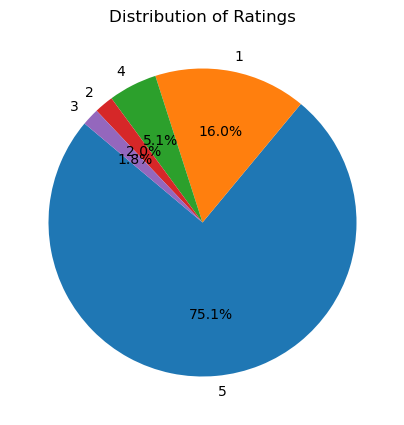

In [6]:
# utilize a pie chart to illustrate the proportion of each rating
#  Get the value counts of the 'rating' column
rating_counts = data['rating'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Distribution of Ratings')

# Show the plot
plt.show()

- Categorizing Ratings into Sentiments: Define a function to categorize ratings into 'Positive' or 'Negative' sentiment. This categorization is based on the rating value, aiding in simplifying the sentiment analysis task.


In [7]:
# Define the function to categorize ratings
def categorize_rating(rating):
    if rating >= 3:
        return 'Positive'
    else:
        return 'Negative'

# Apply the function to the 'rating' column
data['sentiment'] = data['rating'].apply(categorize_rating)


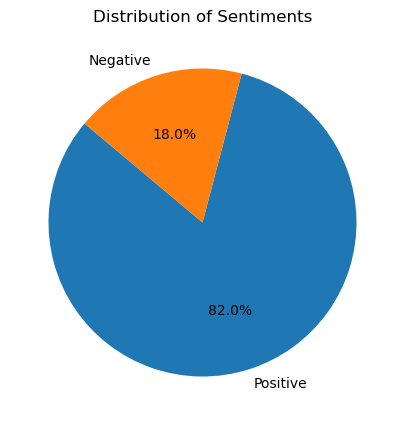

In [8]:
#Utilize a pie chart to show the proportion of each sentiment category within the dataset. 
# Get the value counts of the 'sentiment' column
sentiment_counts = data['sentiment'].value_counts()

# Create a pie chart
plt.figure(figsize=(6,5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Distribution of Sentiments')

# Show the plot
plt.show()

- Sampling Texts Based on Sentiment: Split the dataset into separate lists for 'Negative' and 'Positive' sentiments and then randomly sample 500 texts from each category, ensuring a balanced representation. These samples are crucial for training and evaluating the sentiment analysis model.


In [9]:
import random

# Split the dataset into lists based on sentiment
negative_texts = data[data['sentiment'] == 'Negative']['review_text'].tolist()
positive_texts = data[data['sentiment'] == 'Positive']['review_text'].tolist()

# Modify the sampling to keep text and sentiment together
negative_samples = [(text, 'Negative') for text in random.sample(negative_texts, min(500, len(negative_texts)))]
positive_samples = [(text, 'Positive') for text in random.sample(positive_texts, min(500, len(positive_texts)))]

# Combine the samples
sampled = negative_samples +  positive_samples

# Convert to a DataFrame
sampled_df = pd.DataFrame(sampled, columns=['review_text', 'sentiment'])


- Encoding Sentiment Labels: Transform the sentiment labels into a numerical format using the `LabelEncoder`. This process is essential for model training as it requires numerical input. Additionally, create mappings (`label2id` and `id2label`) for converting between label names and their encoded numbers. These mappings will be helpful for interpretation of the model's predictions.

In [10]:
# Create a map of the expected ids to their labels with id2label and label2id
from sklearn.preprocessing import LabelEncoder

# use LabelEncoder
label_encoder = LabelEncoder()
sampled_df['label'] = label_encoder.fit_transform(sampled_df['sentiment'])

# Creating label2id and id2label mappings
label2id = {label: idx for idx, label in enumerate(label_encoder.classes_)}
id2label = {idx: label for idx, label in enumerate(label_encoder.classes_)}

# Display the mappings
print("label2id:", label2id)
print("id2label:", id2label)

label2id: {'Negative': 0, 'Positive': 1}
id2label: {0: 'Negative', 1: 'Positive'}


- Preparing Data for Model Input: Convert the 'review_text' and 'sentiment' columns from the DataFrame into lists. This step is crucial for the subsequent data processing and model training stages.

In [11]:
#convert the 'review_text' and 'sentiment' columns to lists
text_list = sampled_df['review_text'].tolist()
labels_list = sampled_df['label'].tolist()  

- Splitting the Dataset: Split the dataset into training and testing sets using the `train_test_split` method to evaluate the model's performance on unseen data. The split ratio is set to reserve 20% of the data for testing.

In [12]:
from sklearn.model_selection import train_test_split

# Split the text_list and labels_list into train and test dtaa
train_texts, test_texts, train_labels, test_labels = train_test_split(
    text_list, labels_list, test_size=0.2, random_state=42
)

- Setting up the DistilBERT model for sequence classification and fine-tuning it on our sentiment analysis dataset.
- Installing Necessary Libraries

Install the `transformers` and `torch` libraries which are essential for working with Hugging Face models. These libraries provide the necessary tools for model loading, tokenization, and other NLP tasks.


In [13]:
#Installing Dependencies for transformers and torch, which are commonly used with Hugging Face models.
# Install the transformers library
%pip install transformers

# Install torch
%pip install torch


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


- Loading the Tokenizer: Load the tokenizer corresponding to the `distilbert-base-uncased` model. The tokenizer is used for converting text data into a format that is suitable for the model, truncation to handle variable length inputs.

In [14]:
from transformers import AutoTokenizer

# Specify the model name
model_name = "distilbert-base-uncased"

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)


- Custom Dataset Class: Define a custom function for handling the tokenized texts and labels for organizing and preparing the existing data in a way that's compatible with PyTorch's data handling and model training processes. 

In [15]:
from torch.utils.data import Dataset
class SentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        # Convert label to integer if it's a string
        label = self.labels[idx]
        if isinstance(label, str):
            label = label2id[label]  
        item['labels'] = torch.tensor(label, dtype=torch.long) 
        return item

    def __len__(self):
        return len(self.labels)
    
# Tokenize the training and test data
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True)

# Create the train and test datasets
train_dataset = SentimentDataset(train_encodings, train_labels)
eval_dataset = SentimentDataset(test_encodings, test_labels)

### Evaluating the model's performance to ensure its accuracy and reliability in real-world applications.
- Install the evaluate metric to evaluate the model

In [16]:
%pip install evaluate

Note: you may need to restart the kernel to use updated packages.


#### Load the evaluate metric

In [17]:
import evaluate

accuracy = evaluate.load("accuracy")

- Tokenizing the Data: Tokenize the training and test data using the previously loaded tokenizer. This step converts raw text into a format understandable by the model, ensuring uniformity in token length through padding and truncation.


In [19]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=2, id2label=id2label, label2id=label2id
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'pre_classifier.bias', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [20]:
%pip install transformers[torch]
%pip install accelerate -U

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


- Setting Up Training Configuration: Define the training configurations using `TrainingArguments`. This setup includes specifying the output directory, learning rate, batch sizes for training and evaluation, number of training epochs, weight decay, and the strategy for saving and evaluating the model. The `push_to_hub` flag is set to `False` as the model will not be uploaded to Hugging Face's Model Hub.

- Initializing the Trainer: Set up the `Trainer` with the pre-defined training arguments, the model, and the datasets. The `Trainer` class from Hugging Face's Transformers library simplifies the process of training neural network models. Here, it's configured with the previously loaded model, tokenizer, and the training and evaluation datasets.

- Model Training: Execute the training process using the `Trainer` instance. This step will train the model on the provided dataset according to the specified training arguments, such as the number of epochs, batch size, learning rate, etc.
 

In [21]:
import torch

# Define training arguments
training_args = TrainingArguments(
    output_dir="the morelli model",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False, 
)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset, 
    eval_dataset=eval_dataset,    
    tokenizer=tokenizer,

)

# Train the model
trainer.train()


You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss
1,No log,0.376759
2,No log,0.211862


TrainOutput(global_step=100, training_loss=0.41772468566894533, metrics={'train_runtime': 3018.701, 'train_samples_per_second': 0.53, 'train_steps_per_second': 0.033, 'total_flos': 167654051424000.0, 'train_loss': 0.41772468566894533, 'epoch': 2.0})

-  Preparing Inference Data: Create a separate dataset for inference by sampling additional texts from the negative and positive categories. These samples are distinct from those used in training to ensure an unbiased evaluation of the model's performance on unseen data.

In [22]:
# sampling for inference (ensuring these are not in the first sampled set)
inference_negative_texts = list(set(negative_texts) - set(text for text, _ in negative_samples))
inference_positive_texts = list(set(positive_texts) - set(text for text, _ in positive_samples))

inference_negative_samples = [(text, 'Negative') for text in random.sample(inference_negative_texts, min(10, len(inference_negative_texts)))]
inference_positive_samples = [(text, 'Positive') for text in random.sample(inference_positive_texts, min(10, len(inference_positive_texts)))]

# Combine the samples for inference
inference_sampled = inference_negative_samples + inference_positive_samples

# Convert to a DataFrame for inference
inference_sampled_df = pd.DataFrame(inference_sampled, columns=['review_text', 'sentiment'])

- Loading the Fine-Tuned Model for Inference: Load the fine-tuned model into a Hugging Face `pipeline` for sentiment analysis. This pipeline provides a convenient interface for making predictions with the model.
- Performing Inference and Storing Results: Run the classifier on the inference dataset and store the results, which include the original review text, actual sentiment, predicted sentiment, and the model's confidence score for each prediction.
- Saving Inference Results: Convert the collected inference results into a pandas DataFrame and save it as a CSV file. This file will facilitate further analysis of the model's performance and can be used to review the predictions in detail.


In [26]:
from transformers import pipeline

# Load the fine-tuned model into a pipeline
classifier = pipeline("sentiment-analysis", model="C:/Users/Oby/Desktop/Data Science Portfolio/the morelli model/checkpoint-100")

# Perform inference and store results in a list
inference_results_list = []
for text, actual_sentiment in zip(inference_sampled_df['review_text'], inference_sampled_df['sentiment']):
    prediction = classifier(text)
    inference_results_list.append({
        'review_text': text,
        'sentiment': actual_sentiment,
        'predicted_sentiment': prediction[0]['label'],
        'confidence_score': prediction[0]['score']
    })

# Convert the list to a DataFrame
inference_results_df = pd.DataFrame(inference_results_list)

# Save the DataFrame to a CSV file
inference_results_df.to_csv('inference_results.csv', index=False)

In [28]:
#Display the results
inference_results_df

,review_text,sentiment,predicted_sentiment,confidence_score
0,bought sofa bed 1300 year impossible sit cushi...,Negative,Negative,0.946396
1,poor service moved new build july 2018 giving ...,Negative,Negative,0.889132
2,entire website look incredibly shady right ord...,Negative,Negative,0.958869
3,never received trainer emailed company help de...,Negative,Negative,0.939692
4,buying ok send wrong item pay postage send bac...,Negative,Negative,0.959910
5,guy lost package twice refused refund reshipa ...,Negative,Negative,0.956692
6,beautiful product horrible shipping ordered no...,Negative,Negative,0.936216
7,wont hold charge wont hold temperature either,Negative,Negative,0.852680
8,website scam sent 272usd western union someone...,Negative,Negative,0.957397
9,worst customer service ever report fault take ...,Negative,Negative,0.952610
